In [1]:
import numpy as np
import matplotlib.pyplot as plt
from patch_geometry import ver2patchconnect
%matplotlib  widget

In [2]:
# JUST AN EXAMPLE with two fault segments to show how to set up faultstruct list 
faultstruct = [
    {
        'L': 10.0,                # Length of the fault (along-strike)
        'W': 5.0,                 # Width of the fault (down-dip)
        'strike': 90.0,           # Strike angle in degrees
        'dip': 30.0,              # Dip angle in degrees
        'zt': 2.0,                # Top depth of the fault
        'vertices': np.array([
            [0.0, 10.0],          # x coordinates of fault endpoints
            [0.0, 0.0]            # y coordinates of fault endpoints
        ])
    },
    {
        'L': 8.0,
        'W': 4.0,
        'strike': 45.0,
        'dip': 25.0,
        'zt': 1.0,
        'vertices': np.array([
            [0.0, 8.0],
            [8.0, 0.0]
        ])
    }
]

In [3]:
# another example but just with one fault 
faultstruct = [
    {
        'L': 100000,                # Length of the fault (along-strike)
        'W': 30000,                 # Width of the fault (down-dip)
        'strike': 0.0,              # Strike angle in degrees
        'dip': 71,                  # Dip angle in degrees
        'zt': 0.1,                  # Top depth of the fault
        'vertices': np.array([
            [0.0, 0.0],             # x coordinates of fault endpoints
            [0.0, 0.0]              # y coordinates of fault endpoints
        ])                          # I think the important part is that the average X is the fault top line midpoint X value, same for Y 
    }]

In [4]:
targetLp = 3   # total subdivisions along the length (L)
Wp = 2          # number of subdivisions along width (W)
# how many faults per break, put this in brackets always (even if just one segment),  
faultnp=[1]     # 2 faults, no breaks would be [1,1]

patchstruct, totLp, Wp_output, Lps = ver2patchconnect(faultstruct,targetLp,Wp,faultnp)

In [5]:
print(f"Number of patches: {len(patchstruct)}")
print("First patch data:")
print(patchstruct[0])

Number of patches: 6
First patch data:
{'x0': 4883.522316857351, 'y0': -33333.33333333334, 'z0': 14182.878633989749, 'xs': 2441.7611584286756, 'ys': -33333.33333333334, 'zs': 7091.489316994874, 'strike': 0.0, 'dip': 71, 'L': 33333.333333333336, 'W': 15000.0, 'xfault': array([   0.        ,    0.        , 4883.52231686, 4883.52231686,
          0.        ]), 'yfault': array([-16666.66666667, -50000.        , -50000.        , -16666.66666667,
       -16666.66666667]), 'zfault': array([1.00000000e-01, 1.00000000e-01, 1.41828786e+04, 1.41828786e+04,
       1.00000000e-01]), 'edgetype': 0, 'connect': [nan, nan, 1, nan, 3, nan]}


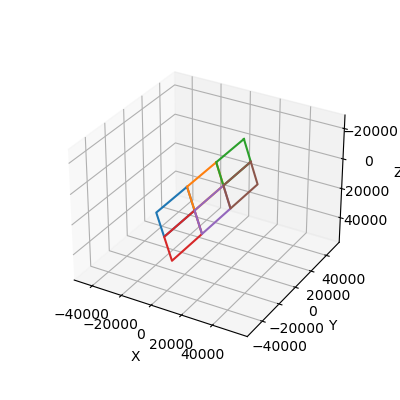

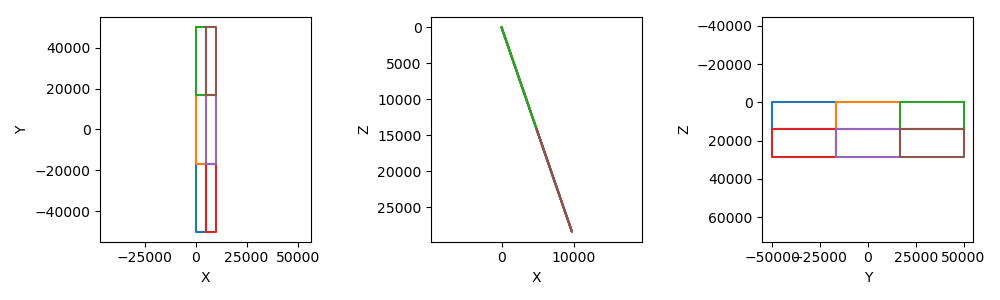

In [6]:
# 3D plot of fault patch corners 
ax = plt.figure(figsize=(4,4)).add_subplot(projection='3d')
# 2D plots in each XY, XZ, and YZ projections 
fig, ax1 = plt.subplots(1,3,figsize=(10,3),tight_layout=True)

for i in range(len(patchstruct)):
    # add the patch to the 3D plot 
    ax.plot(patchstruct[i]['xfault'],patchstruct[i]['yfault'],zs=patchstruct[i]['zfault'])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z') # flipping this axis didn't do anything, with 2 methods. Just have to manually rotate it to show + values as down/depth 
    ax.axis('equal')
    # add the patch to the 2D plots 
    ax1[0].plot(patchstruct[i]['xfault'],patchstruct[i]['yfault'],linestyle='-')
    ax1[0].set_xlabel('X'); ax1[0].set_ylabel('Y'); ax1[0].axis('equal')
    ax1[1].plot(patchstruct[i]['xfault'],patchstruct[i]['zfault'],linestyle='-')
    ax1[1].set_xlabel('X'); ax1[1].set_ylabel('Z'); ax1[1].axis('equal'); ax1[1].invert_yaxis()
    ax1[2].plot(patchstruct[i]['yfault'],patchstruct[i]['zfault'],linestyle='-')
    ax1[2].set_xlabel('Y'); ax1[2].set_ylabel('Z'); ax1[2].axis('equal'); ax1[2].invert_yaxis()
ax.invert_zaxis()
ax1[1].invert_yaxis()
ax1[2].invert_yaxis()